<a href="https://colab.research.google.com/github/junseokkim00/Artificial_Intelligence/blob/main/classification/%5Bassignment%5D_Tree_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# [과제] 최적의 Decision Tree 모델 찾기

---

## 본 과제의 목표는 다음과 같음

1. Decision Tree 모델을 사이킷런 패키지를 이용해 정의할 수 있음
2. `GridSearchCV` 클래스를 이용하여, 가장 높은 성능과 최적의 하이퍼파라미터를 찾을 수 있음

## [P.1] GridSearchCV 클래스를 이용하여 최적의 모델 찾기

이전 과제에서 사용했던 `GridSearchCV` 클래스를 활용해 해당 데이터에 가장 좋은 성능을 보여주는 모델 찾기

In [3]:
# don't change the option
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
def plot_dataset(X, y):
    #################################################
    ############## 데이터셋 plot 연습  #################
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    #################################################

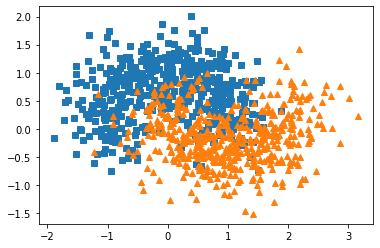

In [5]:
plot_dataset(X, y)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#################################################
########## GridSearchCV를 이용해 모델학습 ###########
# get grid_search_cv
tree_clf = DecisionTreeClassifier(random_state = 42)
params_tree = {
    'max_depth' : [3, 5, 10, 15, 20, 100],
    'max_leaf_nodes' : [10, 20, 30, 100],
    'min_samples_split': [10, 50, 100, 200]}
grid_search_cv = GridSearchCV(tree_clf, params_tree)
grid_search_cv.fit(X_train, y_train)

#################################################

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 100],
                         'max_leaf_nodes': [10, 20, 30, 100],
                         'min_samples_split': [10, 50, 100, 200]})

In [7]:
# get detailed results of cross-validation
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00138321, 0.00136213, 0.00120282, 0.00109677, 0.0011034 ,
        0.00113029, 0.00107803, 0.00110006, 0.00111341, 0.00120192,
        0.00111861, 0.0011539 , 0.00108767, 0.00107579, 0.0011426 ,
        0.00109029, 0.00151229, 0.00185919, 0.00209694, 0.00141139,
        0.00132365, 0.00129523, 0.001231  , 0.0011302 , 0.00176854,
        0.00131321, 0.0012495 , 0.00123391, 0.00134802, 0.00131631,
        0.00126338, 0.0011169 , 0.00125718, 0.00151067, 0.0017076 ,
        0.00115156, 0.00139894, 0.00211987, 0.00124431, 0.001125  ,
        0.0015626 , 0.00138392, 0.00122824, 0.00125551, 0.0015451 ,
        0.00136256, 0.00131993, 0.00136108, 0.00159898, 0.00127082,
        0.0012589 , 0.00112638, 0.00135379, 0.00135612, 0.00121698,
        0.00117989, 0.00144882, 0.00134726, 0.00122232, 0.00110822,
        0.00157552, 0.00137444, 0.00123153, 0.0012352 , 0.00164595,
        0.00127287, 0.00124788, 0.00114474, 0.00135064, 0.00134768,
        0.00124459, 0.00111389,

In [8]:
# get the best estimator
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_split=50,
                       random_state=42)

In [9]:
#################################################
########### 평가 데이터셋에 대한 성능 얻기 #############
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)


#################################################

0.82

In [25]:
def plot_decision_boundary(clf):
    #################################################
    ########### 결정 트리에 대한 결정 경계 시각화 ###########
    x0 = np.linspace(-2, 4, 100)
    x1 = np.linspace(-2, 2.5, 100)

    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X_new)
    y_pred = y_pred.reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.25)

    plt.show()
    #################################################

(10000,)
(100, 100)


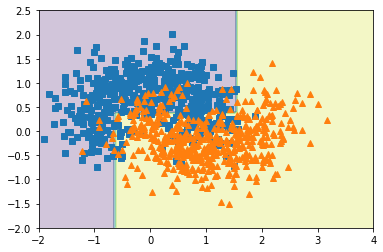

In [24]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y)
plot_decision_boundary(grid_search_cv)

plt.show()